<a href="https://colab.research.google.com/github/MirAb-77/Oasis-Info-Byte-Projects/blob/main/Assignment_No_2_F2022332076_Abdullah_Imran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **Assignment 2**

---

### 👤 **Student Information**
- **Name:** Abdullah Imran  
- **Roll Number:** F2022332076  
- **Degree Program:** BS Data Science  
- **Subject:** Data Science Technologies  
- **Section:** W1

In [ ]:
#  Libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_palette("pastel")

Task No.1

In [ ]:


#  Importing Required Library
import pandas as pd

print("="*65)
print(" TASK 1 – Creating and Exploring a Simple DataFrame".center(65))
print("="*65)

#  Sample Data with More Columns & Rows
data = {
    'Name'      : ['Ali', 'Sara', 'John', 'Ayesha', 'Ahmed', 'Zara', 'Bilal'],
    'Age'       : [22, 28, 35, 24, 30, 26, 32],
    'City'      : ['Lahore', 'Karachi', 'Islamabad', 'Lahore', 'Karachi', 'Multan', 'Peshawar'],
    'Gender'    : ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Department': ['IT', 'HR', 'Finance', 'Marketing', 'IT', 'HR', 'Finance']
}

# 🔧 Creating the DataFrame
df = pd.DataFrame(data)

#  First 3 Rows
print("\n First 3 Rows of the DataFrame:\n" + "-"*45)
print(df.head(3).to_string(index=False))

#  Column Names
print("\n Column Names:\n" + "-"*45)
print(', '.join(df.columns))

#  Data Types of Each Column
print("\nData Types:\n" + "-"*45)
print(df.dtypes.to_string())

        TASK 1 – Creating and Exploring a Simple DataFrame       

 First 3 Rows of the DataFrame:
---------------------------------------------
Name  Age      City Gender Department
 Ali   22    Lahore   Male         IT
Sara   28   Karachi Female         HR
John   35 Islamabad   Male    Finance

 Column Names:
---------------------------------------------
Name, Age, City, Gender, Department

Data Types:
---------------------------------------------
Name          object
Age            int64
City          object
Gender        object
Department    object


Task No.2

In [ ]:
import pandas as pd
import seaborn as sns

print("="*70)
print("TASK 2 – Data Cleaning on Titanic Dataset")
print("="*70)

# Load Titanic Dataset
titanic = sns.load_dataset("titanic")

# Step 1: Check Missing Values Count
print("\nMissing Values in Each Column (Before Cleaning):")
print("-" * 50)
print(titanic.isnull().sum().sort_values(ascending=False).head(10))

# Step 2: Display Rows Containing Any Missing Values
missing_rows = titanic[titanic.isnull().any(axis=1)]
print("\nRows Containing Missing Values:")
print("-" * 50)
print(f"\nTotal Rows with Missing Values: {missing_rows.shape[0]}")
missing_rows.head()  # Display first few for brevity

TASK 2 – Data Cleaning on Titanic Dataset

Missing Values in Each Column (Before Cleaning):
--------------------------------------------------
deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
dtype: int64

Rows Containing Missing Values:
--------------------------------------------------

Total Rows with Missing Values: 709


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
# Step 3: Drop Rows with Any Null Values
titanic_dropped = titanic.dropna()

# Step 4: Fill Missing Values
titanic_filled = titanic.copy()
titanic_filled = titanic_filled.fillna({
    'age': titanic['age'].mean(),       # mean used for age (continuous, normally distributed)
    'fare': titanic['fare'].median()    # median used for fare (skewed distribution, more robust)
})

# Step 5: Check Missing Values After Filling
print("\nMissing Values (After Filling Age and Fare):")
print("-" * 50)
print(titanic_filled[['age', 'fare']].isnull().sum())

# Step 6: Display Shape Comparison
print("\nShape Comparison:")
print("-" * 50)
print(f"Original Dataset Shape:         {titanic.shape}")
print(f"After Dropping Nulls Shape:     {titanic_dropped.shape}")
print(f"After Filling Nulls Shape:      {titanic_filled.shape}")


Missing Values (After Filling Age and Fare):
--------------------------------------------------
age     0
fare    0
dtype: int64

Shape Comparison:
--------------------------------------------------
Original Dataset Shape:         (891, 15)
After Dropping Nulls Shape:     (182, 15)
After Filling Nulls Shape:      (891, 15)


Task No.3

In [ ]:
import pandas as pd

print("="*60)
print(" TASK 3 – Group, Aggregate & Extract Insights from Titanic Data")
print("="*60)

# Step 1: Grouping by 'class' and applying aggregation functions
print("\n Average Age & Fare + Count per Class")
summary = titanic_filled.groupby('class', observed=False)[['age', 'fare']].agg(
    Age_Mean=('age', 'mean'),
    Age_Count=('age', 'count'),
    Fare_Mean=('fare', 'mean'),
    Fare_Sum=('fare', 'sum')
).round(2)

summary

 TASK 3 – Group, Aggregate & Extract Insights from Titanic Data

 Average Age & Fare + Count per Class


,Age_Mean,Age_Count,Fare_Mean,Fare_Sum
class,,,,
First,37.05,216,84.15,18177.41
Second,29.87,184,20.66,3801.84
Third,26.40,491,13.68,6714.70


In [ ]:

# Step 2: Pivot table for average fare by class and gender
print("\n Fare Pivot Table (Class vs Gender)")
pivot = pd.pivot_table(
    titanic_filled,
    index='class',
    columns='sex',
    values='fare',
    aggfunc='mean',
    observed=False
).round(2)

pivot



 Fare Pivot Table (Class vs Gender)


sex,female,male
class,,
First,106.13,67.23
Second,21.97,19.74
Third,16.12,12.66


In [ ]:
# Step 3: Find class-gender with highest avg fare
print("\n Who Paid the Most (on Avg)?")
max_fare = pivot.values.max()
result = pivot.stack().reset_index()
winner = result[result[0] == max_fare].iloc[0]

print(f" Highest Avg Fare: ${max_fare}")
print(f" Class           : {winner['class']}")
print(f" Gender          : {winner['sex']}")


 Who Paid the Most (on Avg)?
 Highest Avg Fare: $106.13
 Class           : First
 Gender          : female


Task No.4

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="darkgrid")  # We'll override some styling manually

print("="*80)
print("TASK 4 – Condition Applied Results (Filtered Data)")
print("="*80)

# Filtered data: Age > 30 and Fare < 50
filtered_df = titanic_filled[(titanic_filled['age'] > 30) & (titanic_filled['fare'] < 50)]
filtered_df.tail(10)

TASK 4 – Condition Applied Results (Filtered Data)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
854,0,2,female,44.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,no,False
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
860,0,3,male,41.0,2,0,14.1083,S,Third,man,True,NaN,Southampton,no,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


Task No.5

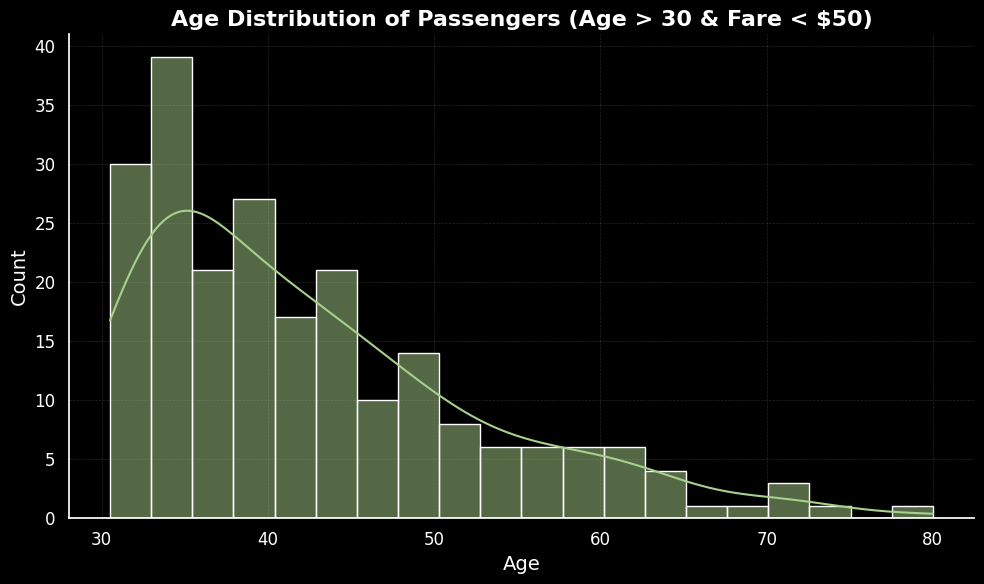

In [ ]:

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=filtered_df, x='age', bins=20, kde=True, color='#A8D08D', edgecolor='white')

# Background & Grid
ax.set_facecolor('black')  # Axes background
plt.gcf().patch.set_facecolor('black')  # Figure background
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

# Titles and Labels
plt.title('Age Distribution of Passengers (Age > 30 & Fare < $50)', fontsize=16, color='white', weight='bold')
plt.xlabel('Age', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')

# Customize tick labels
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Remove top and right spines
sns.despine()

# Tight layout for cleaner look
plt.tight_layout()

# Show the plot
plt.show()

print("="*80)
